In [1]:
%matplotlib inline
# Linear regression
# Initial version from: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
from IPython.display import Image
rng = numpy.random

In [3]:
# Hyper-Parameters
learning_rate = 0.01
training_epochs = 2000
print_step = training_epochs / 5

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

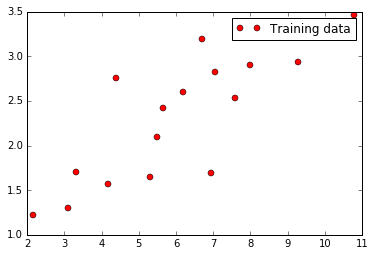

In [5]:
# Display Training Data
plt.plot(train_X, train_Y, 'ro', label='Training data')
plt.legend()
plt.show()

In [6]:
# Input
X = tf.placeholder("float", name="X")
Y = tf.placeholder("float", name="Y")

In [7]:
# Variables
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [8]:
# Construct a linear model
activation = tf.add(tf.mul(X, W), b)

In [9]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [10]:
# Evaluation
sess = tf.Session()
tf.scalar_summary('cost', cost)
merged_summaries = tf.merge_all_summaries()
summary_writer = tf.train.SummaryWriter("/tmp/linear_regression", sess.graph_def)

In [11]:
# Initializing the variables
init = tf.initialize_all_variables()
sess.run(init)

In [12]:
# Run: fit training data
for epoch in range(training_epochs):
    result = sess.run([merged_summaries, optimizer], feed_dict={X: train_X, Y: train_Y})
    
    # Log
    summary_str = result[0]
    summary_writer.add_summary(summary_str, epoch)
    if epoch % print_step == 0:
        print "Epoch ", '%04d' % epoch, \
            "| cost=", "{:.4f}".format(sess.run(cost, feed_dict={X: train_X, Y: train_Y})), \
            "W=", "{:.4f}".format(sess.run(W)), \
            "b=", "{:.4f}".format(sess.run(b))

print "Training Finished!"
print "cost=", "{:.2f}".format(sess.run(cost, feed_dict={X: train_X, Y: train_Y})), \
    "W=", "{:.4f}".format(sess.run(W)), \
    "b=", "{:.4f}".format(sess.run(b))

Epoch  0000 | cost= 0.2376 W= 0.4833 b= -0.4794
Epoch 

 0400 | cost= 0.1156 W= 0.3632 b= 0.0081
Epoch 

 0800 | cost= 0.0916 W= 0.3202 b= 0.3124
Epoch 

 1200 | cost= 0.0825 W= 0.2938 b= 0.4996
Epoch 

 1600 | cost= 0.0790 W= 0.2776 b= 0.6147
Training Finished!


cost= 0.08 W= 0.2676 b= 0.6854


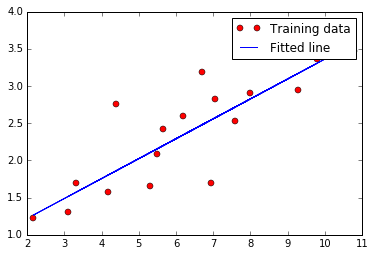

In [13]:
# Plot
plt.plot(train_X, train_Y, 'ro', label='Training data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [14]:
sess.close()